# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [111]:
import requests
import pandas as pd

# Define API Key and base URL
api_key = "0ac7d68a7c1aef4cc033216b29711719"
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Create a list to hold the weather data
weather_data = []

# Loop through the cities and fetch weather data
for city in cities:
    query_url = f"{base_url}q={city}&appid={api_key}&units=metric"
    response = requests.get(query_url).json()

    # Check if the response contains the expected data
    if response.get("cod") == 200:  # Check if the request was successful
        if 'coord' in response and 'main' in response and 'wind' in response and 'clouds' in response:
            weather_data.append({
                "City": city,
                "Latitude": response["coord"]["lat"],
                "Longitude": response["coord"]["lon"],
                "Temperature": response["main"]["temp"],
                "Humidity": response["main"]["humidity"],
                "Cloudiness": response["clouds"]["all"],
                "Wind Speed": response["wind"]["speed"]
            })
    else:
        print(f"City {city} not found. Skipping...")

# Convert the data to a DataFrame
weather_df = pd.DataFrame(weather_data)

# Display the DataFrame
weather_df.head()



City yirol not found. Skipping...
City felidhoo not found. Skipping...
City fuvahmulah not found. Skipping...
City 'ohonua not found. Skipping...
City taiohae not found. Skipping...
City maubara not found. Skipping...
City kapyl' not found. Skipping...
City ouellah not found. Skipping...
City puerto san carlos not found. Skipping...
City chiili not found. Skipping...
City savave village not found. Skipping...
City mahabe not found. Skipping...
City kataragama not found. Skipping...
City yangor not found. Skipping...
City isle of lewis not found. Skipping...
City vecindario not found. Skipping...
City ahau not found. Skipping...
City hayma' not found. Skipping...
City laayoune plage not found. Skipping...
City gia nghia not found. Skipping...
City asau village not found. Skipping...
City port glaud not found. Skipping...
City marudi not found. Skipping...
City cairns city not found. Skipping...
City tranovaho not found. Skipping...
City saratamata not found. Skipping...
City bardaskan n

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,waitangi,-43.9535,-176.5597,7.12,80,99,3.58
1,albany,42.6001,-73.9662,19.94,75,47,2.24
2,vorgashor,67.5833,63.9500,10.69,76,100,5.65
3,ushuaia,-54.8000,-68.3000,3.81,75,20,3.09
4,west island,-12.1568,96.8225,25.99,69,97,6.17


In [112]:
# Convert the cities weather data into a Pandas DataFrame
weather_df = pd.DataFrame(weather_data)

weather_df.count()

City           585
Latitude       585
Longitude      585
Temperature    585
Humidity       585
Cloudiness     585
Wind Speed     585
dtype: int64

In [113]:
# Display sample data
weather_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,waitangi,-43.9535,-176.5597,7.12,80,99,3.58
1,albany,42.6001,-73.9662,19.94,75,47,2.24
2,vorgashor,67.5833,63.9500,10.69,76,100,5.65
3,ushuaia,-54.8000,-68.3000,3.81,75,20,3.09
4,west island,-12.1568,96.8225,25.99,69,97,6.17


In [114]:
# Export the City_Data into a csv
import os

# Define the directory name
output_dir = "output_data"

# Check if the directory exists, if not, create it
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

output_file = os.path.join(output_dir, "weather_data.csv")
weather_df.to_csv(output_file, index=False)

print(f"File saved to {output_file}")


File saved to output_data\weather_data.csv


In [115]:
import os

# List all files in the current directory
print(os.listdir())



['.ipynb_checkpoints', 'api_keys.py', 'Code', 'output_data', 'VacationPy.ipynb', 'WeatherPy.ipynb', '__pycache__']


In [116]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

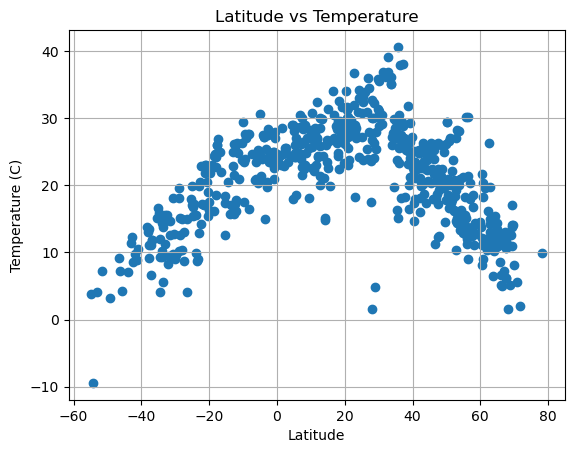

<Figure size 640x480 with 0 Axes>

In [117]:
# Build scatter plot for latitude vs. temperature
import matplotlib.pyplot as plt
# Drop rows with missing values
cities_df = weather_df.dropna()

# Latitude vs Temperature
plt.scatter(cities_df["Latitude"], cities_df["Temperature"])
plt.title("Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.grid(True)
plt.show()
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig11.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

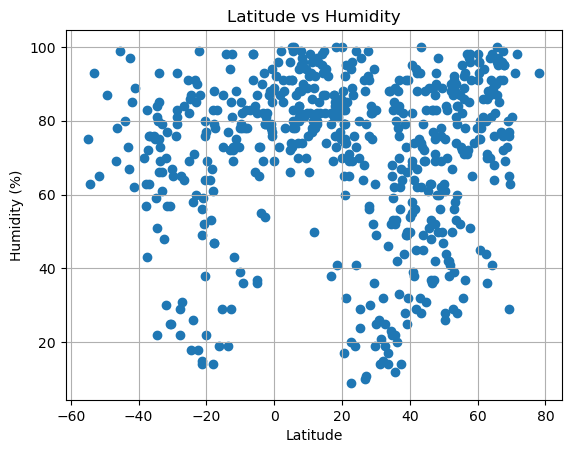

<Figure size 640x480 with 0 Axes>

In [118]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(cities_df["Latitude"], cities_df["Humidity"])
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.show()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

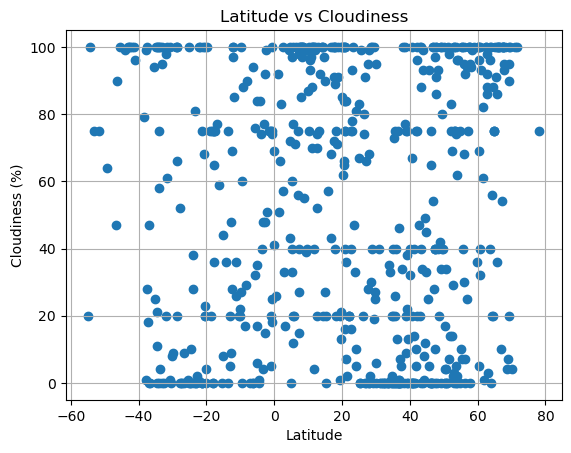

<Figure size 640x480 with 0 Axes>

In [119]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(cities_df["Latitude"], cities_df["Cloudiness"])
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.show()
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

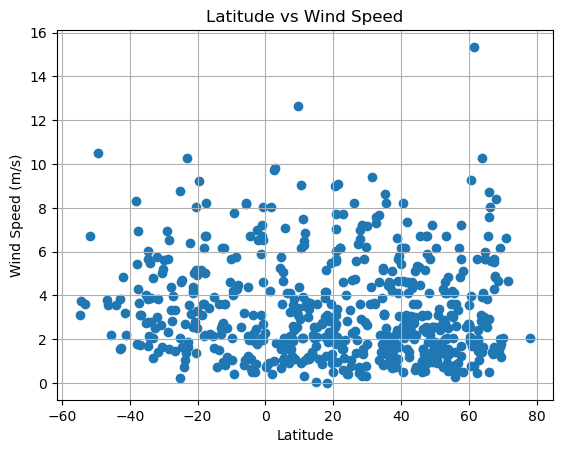

<Figure size 640x480 with 0 Axes>

In [150]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(cities_df["Latitude"], cities_df["Wind Speed"])
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
plt.show()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig44.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [151]:
# Define a function to create Linear Regression plots


In [152]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = cities_df[cities_df["Latitude"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
1,albany,42.6001,-73.9662,19.94,75,47,2.24
2,vorgashor,67.5833,63.9500,10.69,76,100,5.65
10,fakenham,52.8300,0.8477,19.28,87,29,2.87
11,utrik,11.2278,169.8474,27.76,78,100,7.50
12,ilulissat,69.2167,-51.1000,17.01,29,20,6.17


In [153]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = cities_df[cities_df["Latitude"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,waitangi,-43.9535,-176.5597,7.12,80,99,3.58
3,ushuaia,-54.8000,-68.3000,3.81,75,20,3.09
4,west island,-12.1568,96.8225,25.99,69,97,6.17
5,chonchi,-42.6128,-73.8092,8.53,97,100,1.61
6,grytviken,-54.2811,-36.5092,-9.44,63,100,3.74


###  Temperature vs. Latitude Linear Regression Plot

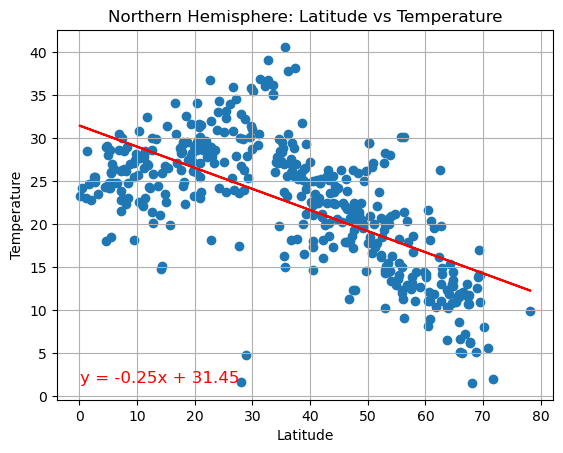

r-squared: 0.42


In [154]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Latitude"], northern_hemi_df["Temperature"], "Northern")

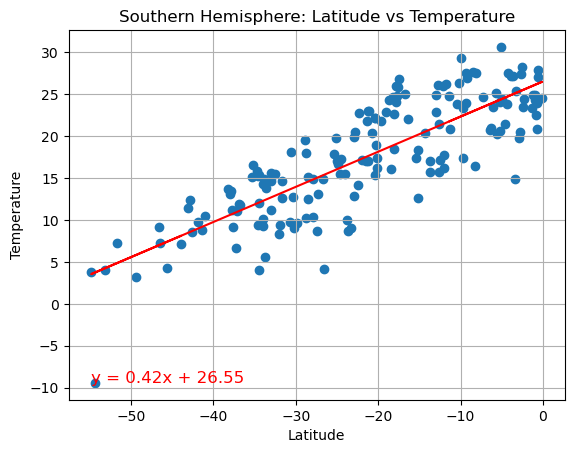

r-squared: 0.68


In [155]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Latitude"], southern_hemi_df["Temperature"], "Southern")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

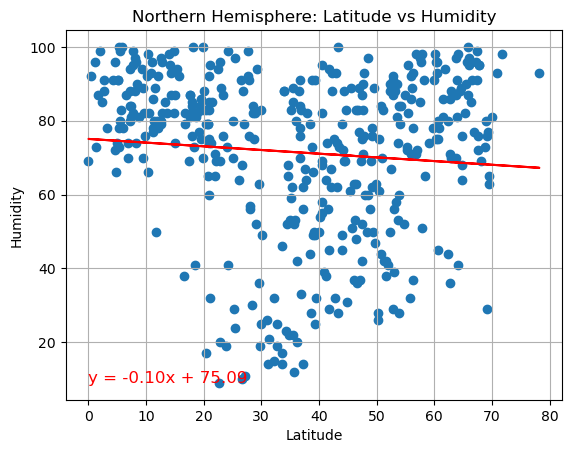

r-squared: 0.01


In [156]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Latitude"], northern_hemi_df["Humidity"], "Northern")


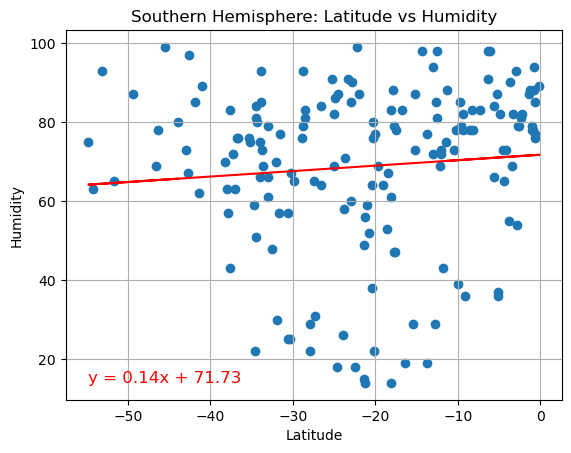

r-squared: 0.01


In [157]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Latitude"], southern_hemi_df["Humidity"], "Southern")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

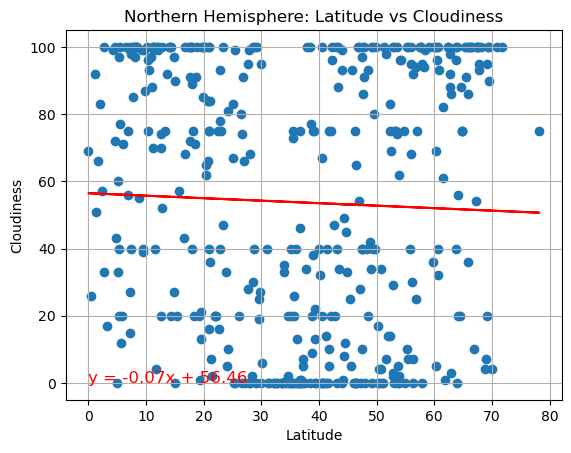

r-squared: 0.00


In [158]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Latitude"], northern_hemi_df["Cloudiness"], "Northern")

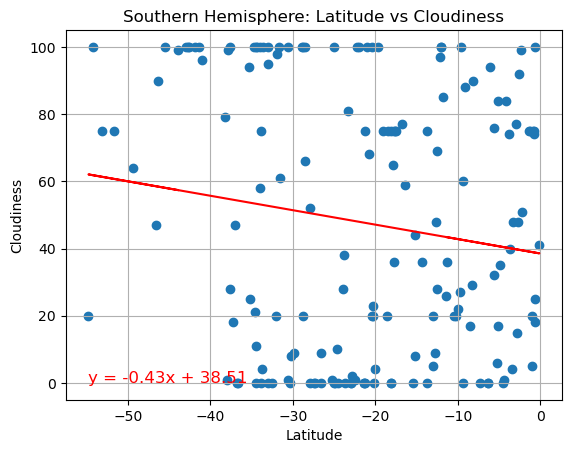

r-squared: 0.02


In [159]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Latitude"], southern_hemi_df["Cloudiness"], "Southern")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

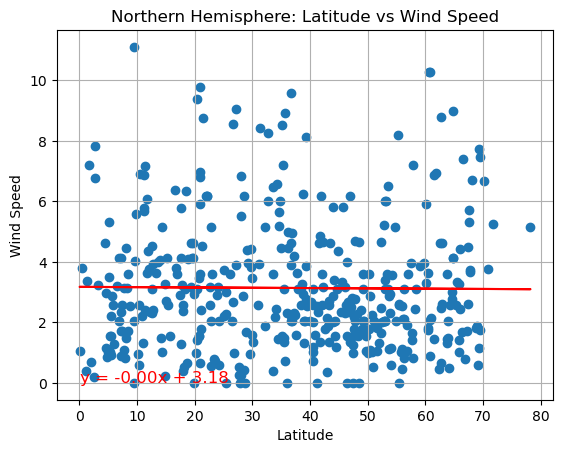

r-squared: 0.00


In [164]:
# Northern Hemisphere
plot_linear_regression(northern_hemi["Latitude"], northern_hemi["Wind Speed"], "Northern")

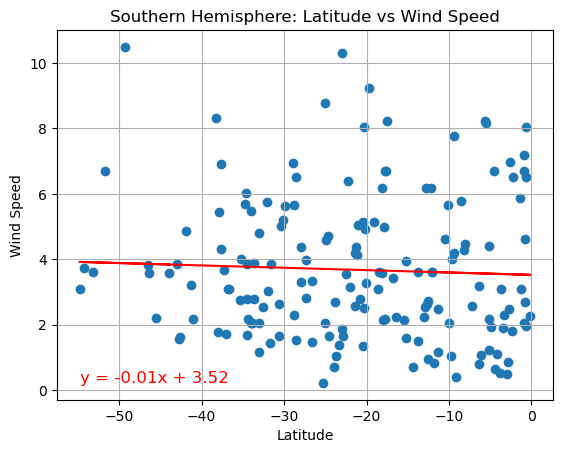

r-squared: 0.00


In [162]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Latitude"], southern_hemi_df["Wind Speed"], "Southern")

**Discussion about the linear relationship:** YOUR RESPONSE HERE